In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.Session()

# 乱数シードを設定
tf.set_random_seed(5)
np.random.seed(42)

In [2]:
batch_size = 50

a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [3]:
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))

relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

In [4]:
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

In [5]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)

init = tf.global_variables_initializer()
sess.run(init)

In [6]:
print('\nOptimizing Sigmoid AND Relu Output to 0.75')
loss_vec_sigmoid = []
loss_vec_relu = []
activation_sigmoid = []
activation_relu = []
for i in range(500):
    # バッチを選択するためのインデックスをランダムに選択
    rand_indices = np.random.choice(len(x), size=batch_size)
    # トレーニングセットの値を選択
    x_vals = np.transpose([x[rand_indices]])
    # トレーニングステップを実行
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data: x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))
    
    activation_sigmoid.append(np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals})))
    activation_relu.append(np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals})))
    
    if i%50==0:
        print('sigmoid = ' + str(np.mean(activation_sigmoid)) + ' relu = ' + str(np.mean(activation_relu)))


Optimizing Sigmoid AND Relu Output to 0.75
sigmoid = 0.126552 relu = 2.02276
sigmoid = 0.150686 relu = 0.9967
sigmoid = 0.179963 relu = 0.874896
sigmoid = 0.218689 relu = 0.833165
sigmoid = 0.262906 relu = 0.812358
sigmoid = 0.308055 relu = 0.799647
sigmoid = 0.349574 relu = 0.791327
sigmoid = 0.38639 relu = 0.785262
sigmoid = 0.418291 relu = 0.780702
sigmoid = 0.445836 relu = 0.777215


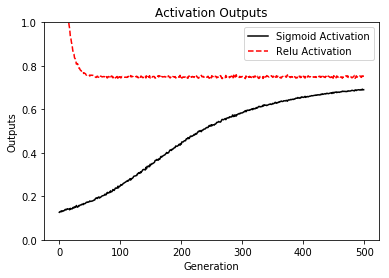

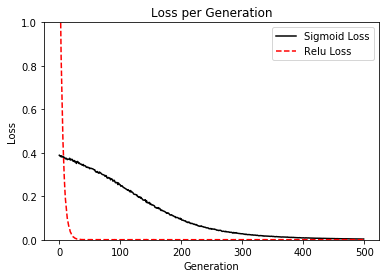

In [7]:
# 活性化関数の出力と損失関数の出力をプロットする。
plt.plot(activation_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(activation_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()

# 損失関数の出力をプロット
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Loss')
plt.plot(loss_vec_relu, 'r--', label='Relu Loss')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()